<a href="https://colab.research.google.com/github/sevenZHQ1018/hangqi-zhang/blob/main/Class2_lab2_hangqi_zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the FRED API library
!pip install fredapi

In [2]:
# Install the FRED API library
!pip install fredapi

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='9f4b17878b3f30403443751c18ee087b')

In [3]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [4]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


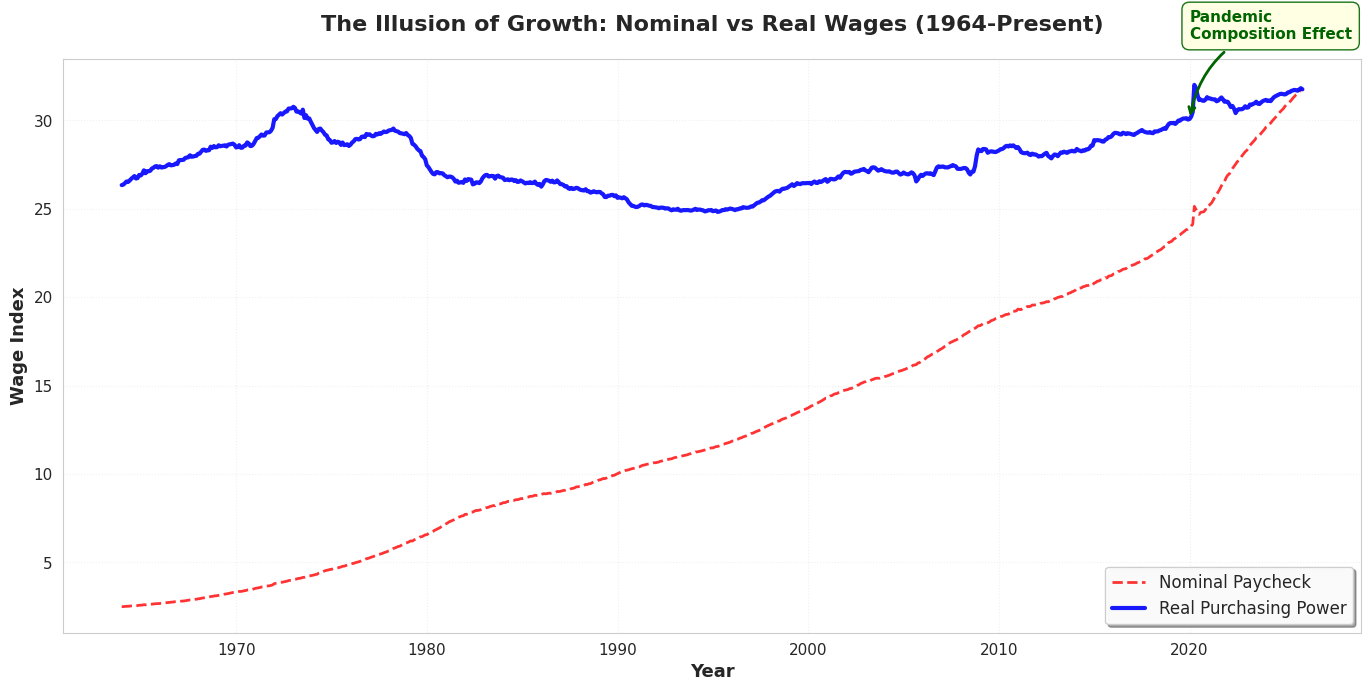

✅ Chart created successfully


In [5]:
# 创建专业的经济时间序列图
import matplotlib.pyplot as plt
import seaborn as sns

# 设置样式
sns.set_style("whitegrid")

# 创建图表
fig, ax = plt.subplots(figsize=(14, 7))

# 绘制名义工资（虚线红线）
ax.plot(df.index, df['Nominal_Wage'],
        color='red',
        linestyle='--',
        linewidth=2,
        label='Nominal Paycheck',
        alpha=0.8)

# 绘制实际工资（粗蓝线）
ax.plot(df.index, df['Real_Wage'],
        color='blue',
        linestyle='-',
        linewidth=3,
        label='Real Purchasing Power',
        alpha=0.9)

# 设置标题和标签
ax.set_title('The Illusion of Growth: Nominal vs Real Wages (1964-Present)',
            fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Wage Index', fontsize=13, fontweight='bold')

# 添加2020年疫情注释
# 找到2020年的数据点
if '2020' in df.index.astype(str) or 2020 in df.index.year:
    # 尝试定位2020年
    try:
        if hasattr(df.index, 'year'):
            idx_2020 = df.index[df.index.year == 2020][0]
        else:
            idx_2020 = df.index[df.index.astype(str).str.contains('2020')][0]

        real_wage_2020 = df.loc[idx_2020, 'Real_Wage']

        # 添加注释箭头
        ax.annotate('Pandemic\nComposition Effect',
                   xy=(idx_2020, real_wage_2020),
                   xytext=(idx_2020, real_wage_2020 + (real_wage_2020 * 0.15)),
                   arrowprops=dict(arrowstyle='->',
                                 color='darkgreen',
                                 lw=2,
                                 connectionstyle='arc3,rad=0.3'),
                   fontsize=11,
                   fontweight='bold',
                   color='darkgreen',
                   bbox=dict(boxstyle='round,pad=0.5',
                           facecolor='lightyellow',
                           edgecolor='darkgreen',
                           alpha=0.9))
    except:
        print("Note: 2020 data point not found for annotation")

# 图例
ax.legend(fontsize=12, loc='best', framealpha=0.95, shadow=True)

# 网格
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)
ax.set_axisbelow(True)

# 刻度标签大小
ax.tick_params(labelsize=11)

# 调整布局
plt.tight_layout()

# 保存图表
plt.savefig('nominal_vs_real_wages.png', dpi=300, bbox_inches='tight', facecolor='white')

# 显示图表
plt.show()

print("✅ Chart created successfully")

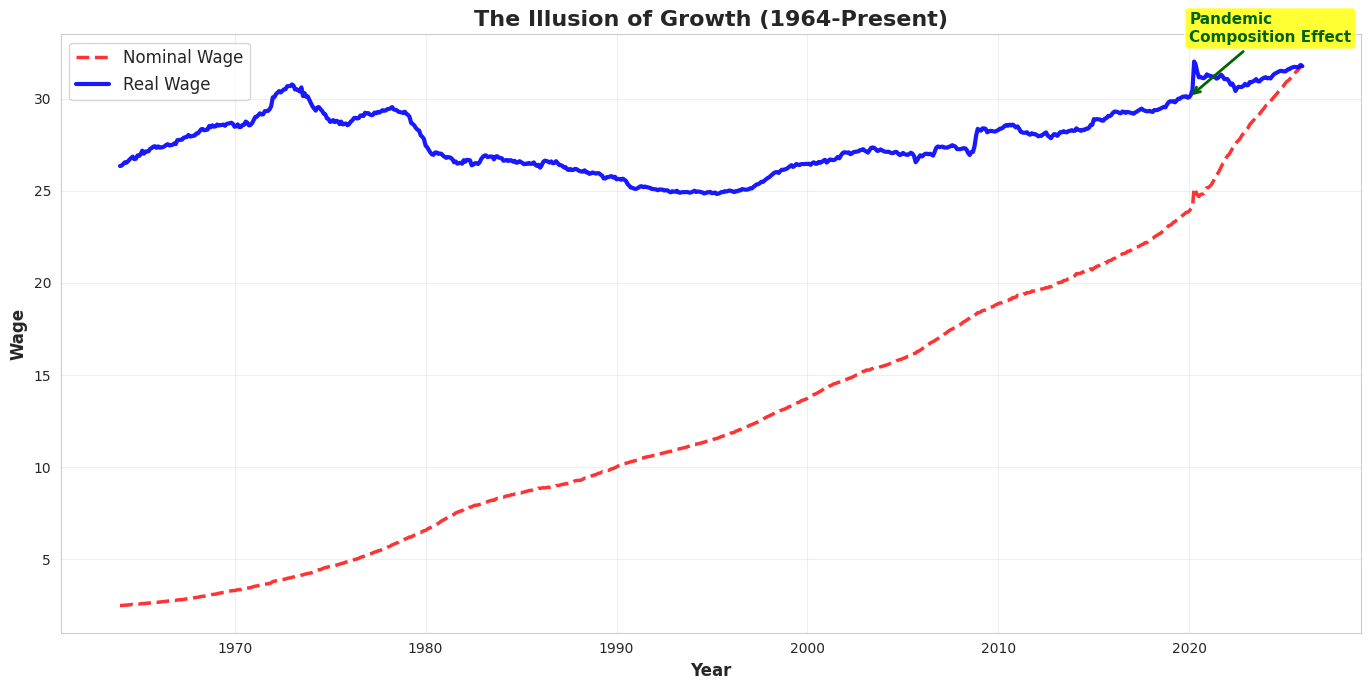

In [7]:
import matplotlib.pyplot as plt

# 创建图表
fig, ax = plt.subplots(figsize=(14, 7))

# 绘制名义工资（虚线）
ax.plot(df.index, df['Nominal_Wage'],
        linestyle='--',
        linewidth=2.5,
        label='Nominal Wage',
        color='red',
        alpha=0.8)

# 绘制实际工资（粗蓝线）
ax.plot(df.index, df['Real_Wage'],
        linestyle='-',
        linewidth=3,
        label='Real Wage',
        color='blue',
        alpha=0.9)

# 标题
ax.set_title('The Illusion of Growth (1964-Present)',
            fontsize=16, fontweight='bold')

# 轴标签
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Wage', fontsize=12, fontweight='bold')

# 添加2020年注释
try:
    # 找到2020年
    if hasattr(df.index, 'year'):
        idx_2020 = df.index[df.index.year == 2020][0]
    else:
        idx_2020 = df.index[df.index.astype(str).str.contains('2020')][0]

    real_2020 = df.loc[idx_2020, 'Real_Wage']

    # 添加注释箭头
    ax.annotate('Pandemic\nComposition Effect',
               xy=(idx_2020, real_2020),
               xytext=(idx_2020, real_2020 * 1.1),
               arrowprops=dict(arrowstyle='->',
                             color='darkgreen',
                             lw=2),
               fontsize=11,
               fontweight='bold',
               color='darkgreen',
               bbox=dict(boxstyle='round',
                       facecolor='yellow',
                       alpha=0.8))
except:
    print("2020 data not found")

# 图例和网格
ax.legend(fontsize=12, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Fetching Employment Cost Index...
✓ ECIWAG fetched

Filtered data from 2015-01-01:
  Wages: 132 observations
  ECI: 43 observations

Indexed to 2015-01-01 = 100:
  Wages base value: 20.80
  ECI base value: 122.60
✓ 2020 annotations added
  Wages spike: 114.95
  ECI value: 114.44
  Difference: 0.51 points


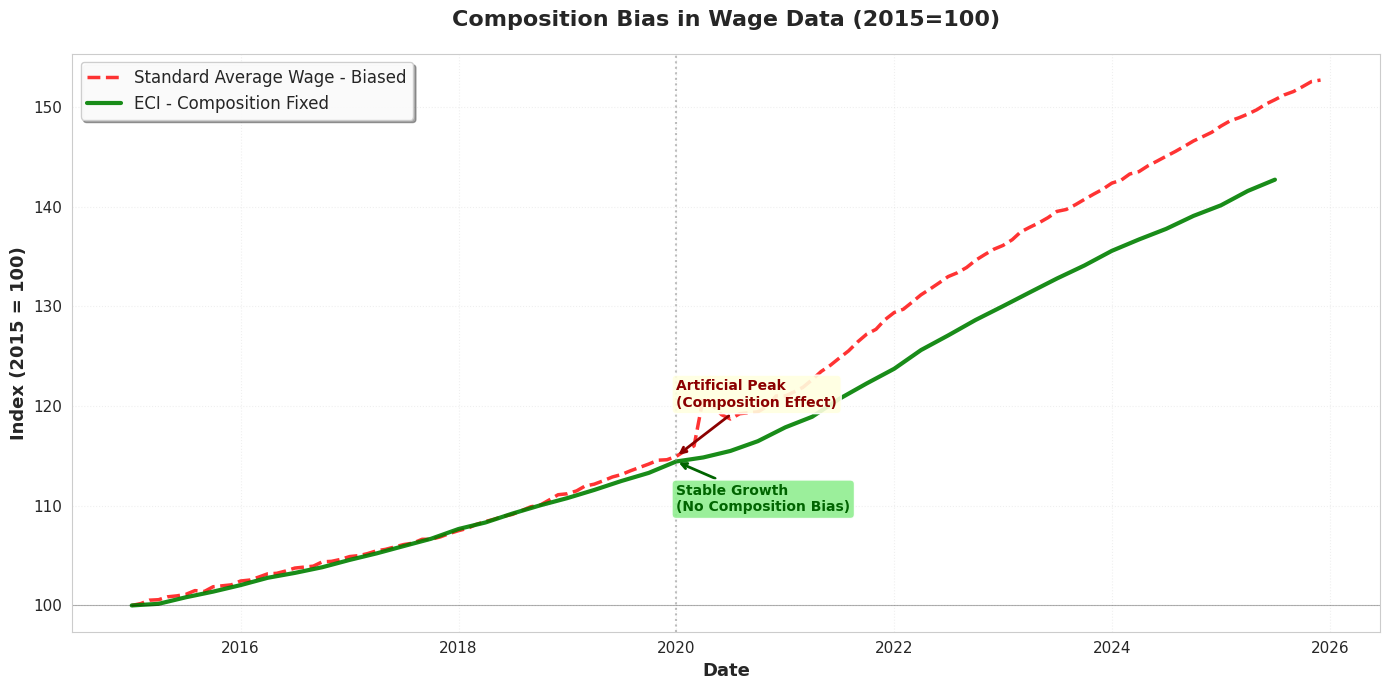

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 获取就业成本指数（ECI）
print("Fetching Employment Cost Index...")
eci = fred.get_series('ECIWAG')
print("✓ ECIWAG fetched")

# 2. 筛选2015年1月1日之后的数据
wages_filtered = wages.loc['2015-01-01':].copy()
eci_filtered = eci.loc['2015-01-01':].copy()

print(f"\nFiltered data from 2015-01-01:")
print(f"  Wages: {len(wages_filtered)} observations")
print(f"  ECI: {len(eci_filtered)} observations")

# 3. 重新基数为100（第一个值=100）
wages_indexed = (wages_filtered / wages_filtered.iloc[0]) * 100
eci_indexed = (eci_filtered / eci_filtered.iloc[0]) * 100

print(f"\nIndexed to 2015-01-01 = 100:")
print(f"  Wages base value: {wages_filtered.iloc[0]:.2f}")
print(f"  ECI base value: {eci_filtered.iloc[0]:.2f}")

# 4. 绘制对比图
fig, ax = plt.subplots(figsize=(14, 7))

# 标准平均工资（红色虚线）- 有偏差
ax.plot(wages_indexed.index, wages_indexed,
        color='red',
        linestyle='--',
        linewidth=2.5,
        label='Standard Average Wage - Biased',
        alpha=0.8)

# ECI（绿色粗实线）- 修正构成效应
ax.plot(eci_indexed.index, eci_indexed,
        color='green',
        linestyle='-',
        linewidth=3,
        label='ECI - Composition Fixed',
        alpha=0.9)

# 标题和标签
ax.set_title('Composition Bias in Wage Data (2015=100)',
            fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=13, fontweight='bold')
ax.set_ylabel('Index (2015 = 100)', fontsize=13, fontweight='bold')

# 5. 注释2020年的差异
try:
    # 找到2020年的索引
    if hasattr(wages_indexed.index, 'year'):
        idx_2020 = wages_indexed.index[wages_indexed.index.year == 2020]
        if len(idx_2020) > 0:
            idx_2020 = idx_2020[0]

            wages_2020 = wages_indexed.loc[idx_2020]
            eci_2020 = eci_indexed.loc[idx_2020]

            # 注释工资的"人工峰值"
            ax.annotate('Artificial Peak\n(Composition Effect)',
                       xy=(idx_2020, wages_2020),
                       xytext=(idx_2020, wages_2020 + 5),
                       arrowprops=dict(arrowstyle='->',
                                     color='darkred',
                                     lw=2),
                       fontsize=10,
                       fontweight='bold',
                       color='darkred',
                       bbox=dict(boxstyle='round',
                               facecolor='lightyellow',
                               alpha=0.9))

            # 注释ECI的"稳定增长"
            ax.annotate('Stable Growth\n(No Composition Bias)',
                       xy=(idx_2020, eci_2020),
                       xytext=(idx_2020, eci_2020 - 5),
                       arrowprops=dict(arrowstyle='->',
                                     color='darkgreen',
                                     lw=2),
                       fontsize=10,
                       fontweight='bold',
                       color='darkgreen',
                       bbox=dict(boxstyle='round',
                               facecolor='lightgreen',
                               alpha=0.9))

            # 添加垂直参考线
            ax.axvline(x=idx_2020, color='gray', linestyle=':',
                      linewidth=1.5, alpha=0.5)

            print(f"✓ 2020 annotations added")
            print(f"  Wages spike: {wages_2020:.2f}")
            print(f"  ECI value: {eci_2020:.2f}")
            print(f"  Difference: {wages_2020 - eci_2020:.2f} points")
except Exception as e:
    print(f"Note: Could not add 2020 annotation - {e}")

# 添加基准线
ax.axhline(y=100, color='black', linestyle='-', linewidth=0.8, alpha=0.3)

# 图例
ax.legend(fontsize=12, loc='upper left', framealpha=0.95, shadow=True)

# 网格
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)
ax.set_axisbelow(True)

# 刻度
ax.tick_params(labelsize=11)

plt.tight_layout()
plt.savefig('composition_bias_wages.png', dpi=300)